# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 601


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        city_weather_json = city_weather.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather_json["coord"]["lat"]
        city_lng = city_weather_json["coord"]["lon"]
        city_max_temp = city_weather_json["main"]["temp_max"]
        city_humidity = city_weather_json["main"]["humidity"]
        city_clouds = city_weather_json["clouds"]["all"]
        city_wind = city_weather_json["wind"]["speed"]
        city_country = city_weather_json["sys"]["country"]
        city_date = city_weather_json["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ambodifotatra
Processing Record 2 of Set 1 | puerto natales
Processing Record 3 of Set 1 | thompson
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | quellon
Processing Record 6 of Set 1 | huarmey
Processing Record 7 of Set 1 | lazaro cardenas
Processing Record 8 of Set 1 | petropavlovsk-kamchatsky
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | klyuchi
Processing Record 11 of Set 1 | island harbour
Processing Record 12 of Set 1 | murygino
Processing Record 13 of Set 1 | cullowhee
Processing Record 14 of Set 1 | iskateley
Processing Record 15 of Set 1 | grytviken
Processing Record 16 of Set 1 | iqaluit
Processing Record 17 of Set 1 | udachny
Processing Record 18 of Set 1 | blackmans bay
Processing Record 19 of Set 1 | taiohae
City not found. Skipping...
Processing Record 20 of Set 1 | avarua
Processing Record 21 of Set 1 | belleville
Processi

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [5]:
# Display sample data
# Convert temperature from Kelvin to Celsius
city_data_df["Max Temp"] = city_data_df["Max Temp"] - 273.15

city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ambodifotatra,-16.9833,49.8500,22.31,82,27,2.83,MG,1691701175
1,puerto natales,-51.7236,-72.4875,3.02,80,100,2.81,CL,1691700976
2,thompson,55.7435,-97.8558,19.09,48,75,1.54,CA,1691700970
3,port-aux-francais,-49.3500,70.2167,3.93,90,100,14.89,TF,1691700979
4,quellon,-43.1167,-73.6167,7.14,81,75,8.23,CL,1691701007


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ambodifotatra,-16.9833,49.8500,22.31,82,27,2.83,MG,1691701175
1,puerto natales,-51.7236,-72.4875,3.02,80,100,2.81,CL,1691700976
2,thompson,55.7435,-97.8558,19.09,48,75,1.54,CA,1691700970
3,port-aux-francais,-49.3500,70.2167,3.93,90,100,14.89,TF,1691700979
4,quellon,-43.1167,-73.6167,7.14,81,75,8.23,CL,1691701007


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

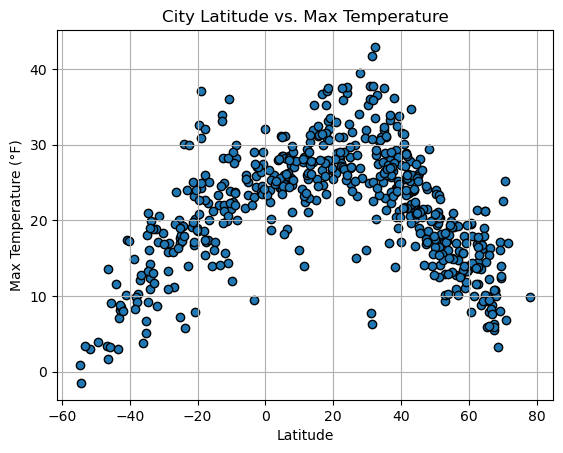

<Figure size 640x480 with 0 Axes>

In [8]:
# Build scatter plot for latitude vs. temperature
latitudes = city_data_df["Lat"]
temperatures = city_data_df["Max Temp"]

# Incorporate the other graph properties
plt.scatter(latitudes, temperatures, marker="o", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")
plt.title("City Latitude vs. Max Temperature")
plt.grid(True)
plt.show()


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

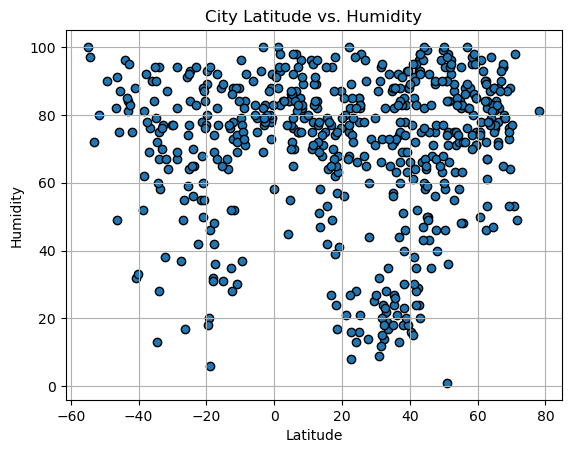

<Figure size 640x480 with 0 Axes>

In [9]:
# Build the scatter plots for latitude vs. humidity
latitude = city_data_df["Lat"]
humidity = city_data_df["Humidity"]

# Incorporate the other graph properties
plt.scatter(latitudes, humidity, marker="o", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Latitude vs. Humidity")
plt.grid(True)
plt.show()


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

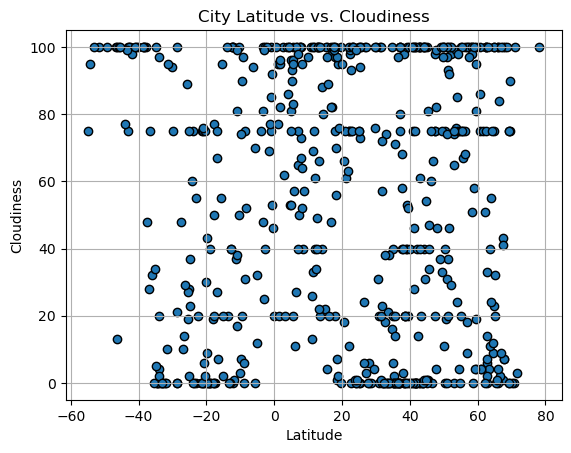

<Figure size 640x480 with 0 Axes>

In [10]:
# Build the scatter plots for latitude vs. cloudiness
latitude = city_data_df["Lat"]
cloudiness = city_data_df["Cloudiness"]

# Incorporate the other graph properties
plt.scatter(latitudes, cloudiness, marker="o", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs. Cloudiness")
plt.grid(True)
plt.show()


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

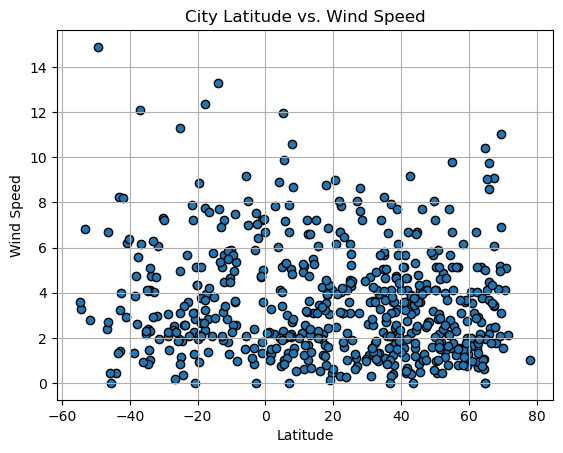

<Figure size 640x480 with 0 Axes>

In [11]:
# Build the scatter plots for latitude vs. wind speed
latitude = city_data_df["Lat"]
wind_speed = city_data_df["Wind Speed"]
# Incorporate the other graph properties
plt.scatter(latitudes, wind_speed, marker="o", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("City Latitude vs. Wind Speed")
plt.grid(True)
plt.show()


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


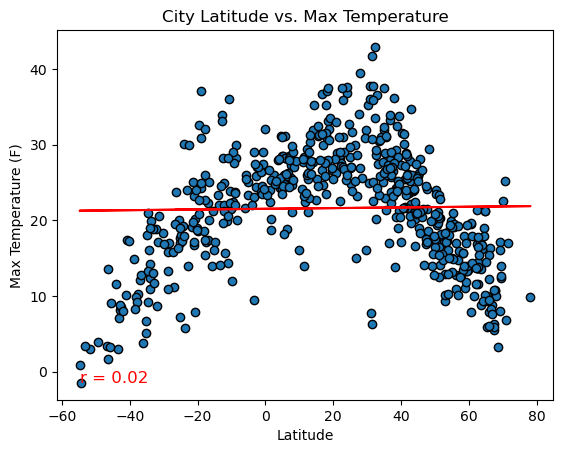

In [12]:
# Define a function to create Linear Regression plots
def create_linear_regression_plot(x_values, y_values, x_label, y_label, title, file_name):
    # Calculate linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    regress_values = slope * x_values + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create scatter plot
    plt.scatter(x_values, y_values, marker="o", edgecolors="black")
    plt.plot(x_values, regress_values, "r-")

    # Add labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

    # Display r-value as annotation
    plt.annotate(f"r = {r_value:.2f}", (min(x_values), min(y_values)), fontsize=12, color="red")

    # Save the plot as an image
    plt.savefig(file_name)

    # Show plot
    plt.show()

# Example usage
create_linear_regression_plot(city_data_df["Lat"], city_data_df["Max Temp"],
                              "Latitude", "Max Temperature (F)", "City Latitude vs. Max Temperature",
                              "output_data/lat_vs_temp.png")


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

northern_hemisphere_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemisphere_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,thompson,55.7435,-97.8558,19.09,48,75,1.54,CA,1691700970
6,lazaro cardenas,17.9583,-102.2000,31.51,62,75,3.54,MX,1691700884
7,petropavlovsk-kamchatsky,53.0452,158.6483,9.33,87,0,4.00,RU,1691700977
9,klyuchi,52.2667,79.1667,17.05,92,98,4.85,RU,1691701002
10,island harbour,50.7240,-1.2758,19.40,90,19,0.45,GB,1691701176


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
Southern_hemisphere_df = city_data_df[city_data_df["Lat"] <= 0]

# Display sample data
Southern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ambodifotatra,-16.9833,49.8500,22.31,82,27,2.83,MG,1691701175
1,puerto natales,-51.7236,-72.4875,3.02,80,100,2.81,CL,1691700976
3,port-aux-francais,-49.3500,70.2167,3.93,90,100,14.89,TF,1691700979
4,quellon,-43.1167,-73.6167,7.14,81,75,8.23,CL,1691701007
5,huarmey,-10.0681,-78.1522,21.51,74,3,5.87,PE,1691701175


###  Temperature vs. Latitude Linear Regression Plot

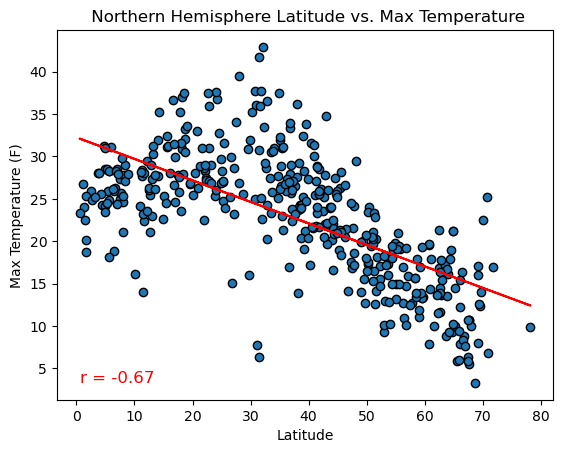

In [15]:
# Linear regression on Northern Hemisphere

create_linear_regression_plot(northern_hemisphere_df["Lat"], northern_hemisphere_df["Max Temp"],
                              "Latitude", "Max Temperature (F)", " Northern Hemisphere Latitude vs. Max Temperature",
                              "output_data/lat_vs_temp.png")

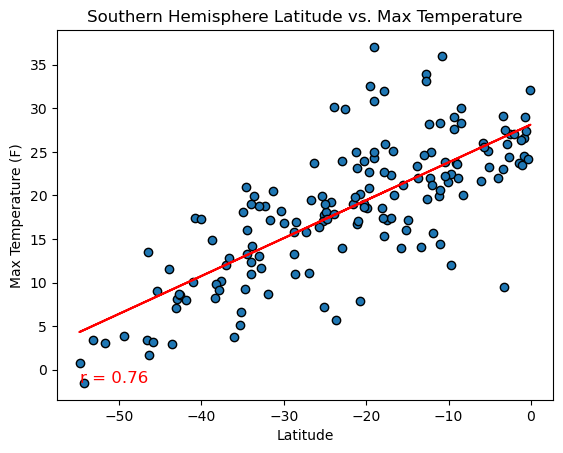

In [16]:
# Linear regression on Southern Hemisphere
create_linear_regression_plot(Southern_hemisphere_df["Lat"], Southern_hemisphere_df["Max Temp"],
                              "Latitude", "Max Temperature (F)", "Southern Hemisphere Latitude vs. Max Temperature",
                              "output_data/lat_vs_temp.png")

**Discussion about the linear relationship:**

for the Northern Hemisphere with an r-value = -0.76 indicate a moderate negative correlation (inverse relatioship between lat and max temp) that tell us that as we move away from the equator higher latitudes, there is a tendency for the max temperature to drecrease.

for the Southern Hemisphere with an r-value = 0.81 indicates a strong positive correlation, that tell us as we move closer to equator in the southern hemisphere, max temperatures tends to increase.

### Humidity vs. Latitude Linear Regression Plot

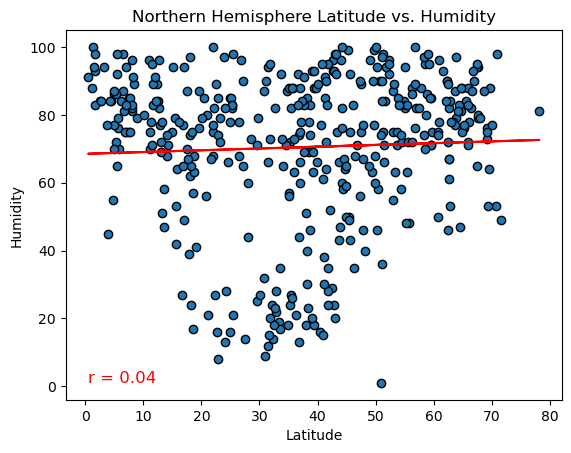

In [17]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemisphere_df["Lat"], northern_hemisphere_df["Humidity"],
                              "Latitude", "Humidity", "Northern Hemisphere Latitude vs. Humidity",
                              "output_data/lat_vs_humnorth.png")

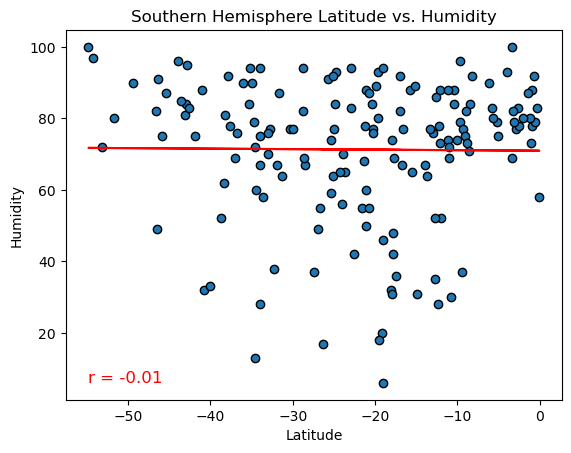

In [18]:
# Southern Hemisphere
create_linear_regression_plot(Southern_hemisphere_df["Lat"], Southern_hemisphere_df["Humidity"],
                              "Latitude", "Humidity", "Southern Hemisphere Latitude vs. Humidity",
                              "output_data/lat_vs_humsouth.png")

**Discussion about the linear relationship:** 
The correlation coefficients for both hemispheres northernt 
r=-0.04 and southern r=-0.01 indicate a weak negation correlation between humidity and latitude.This tell us that there is a slightly tendency for humidity to decrease as you move away from the equator towards higher latitudes.

### Cloudiness vs. Latitude Linear Regression Plot

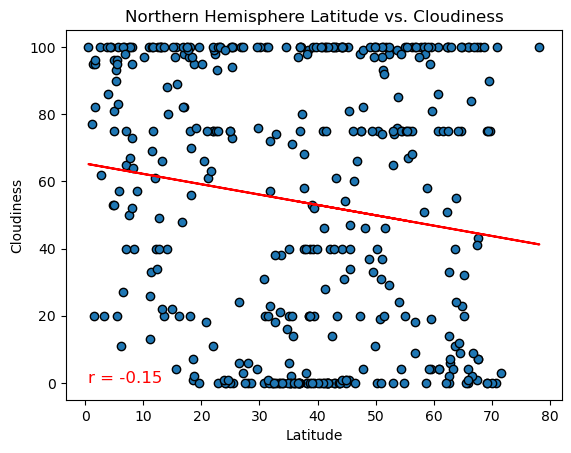

In [19]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemisphere_df["Lat"], northern_hemisphere_df["Cloudiness"],
                              "Latitude", "Cloudiness", "Northern Hemisphere Latitude vs. Cloudiness",
                              "output_data/lat_vs_cloudnorth.png")

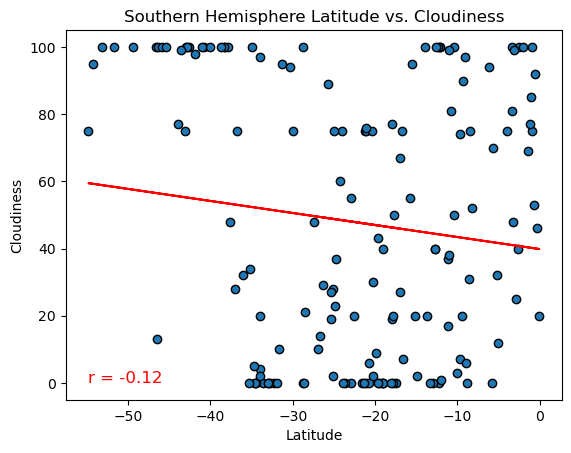

In [20]:
# Southern Hemisphere
create_linear_regression_plot(Southern_hemisphere_df["Lat"], Southern_hemisphere_df["Cloudiness"],
                              "Latitude", "Cloudiness", "Southern Hemisphere Latitude vs. Cloudiness",
                              "output_data/lat_vs_cloudsouth.png")

**Discussion about the linear relationship:** 
The correlation coefficients for both hemispheres northernt 
r=-0.15 and southern r=-0.12 indicate a weak negation correlation between cloudiness and latitude.

### Wind Speed vs. Latitude Linear Regression Plot

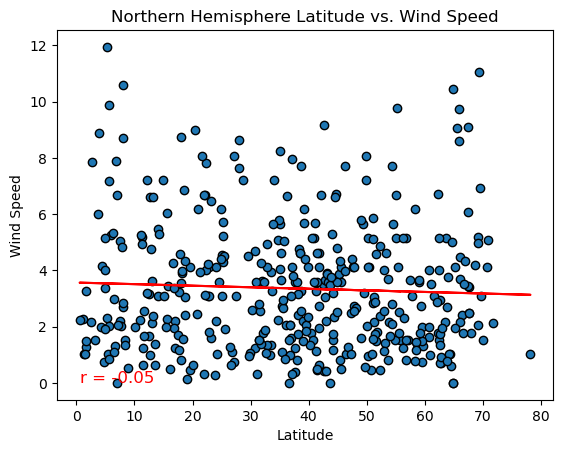

In [21]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemisphere_df["Lat"], northern_hemisphere_df["Wind Speed"],
                              "Latitude", "Wind Speed", "Northern Hemisphere Latitude vs. Wind Speed",
                              "output_data/lat_vs_windnorth.png")

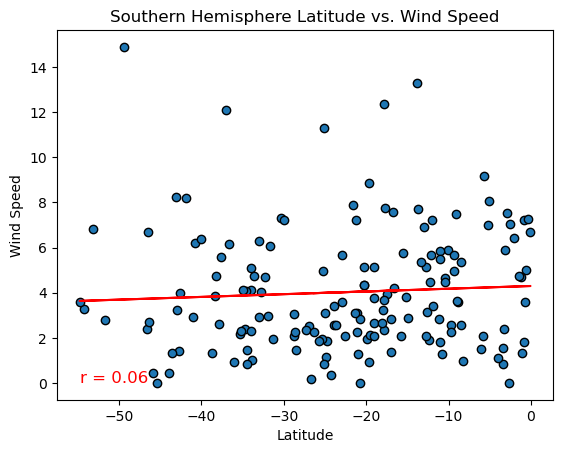

In [22]:
# Southern Hemisphere
create_linear_regression_plot(Southern_hemisphere_df["Lat"], Southern_hemisphere_df["Wind Speed"],
                              "Latitude", "Wind Speed", "Southern Hemisphere Latitude vs. Wind Speed",
                              "output_data/lat_vs_windsouth.png")

**Discussion about the linear relationship:** 
The correlation coefficients for both hemispheres northernt 
r=0.05 and southern r=0.06 indicate a weak correlation between wind speed and latitude.
